## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack , csr_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('books.csv')

C:\Users\DSYS\AppData\Local\Temp\ipykernel_1992\468838320.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('books.csv')


In [3]:
data.shape

(271360, 8)

In [4]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
# Filter data
data = data[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S']]

In [7]:
data.isnull().sum()

Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
dtype: int64

In [8]:
data.dropna(subset=['Book-Author', 'Publisher'], inplace=True)

In [9]:
data.drop_duplicates(subset=['Book-Title'], inplace=True)

In [10]:
data.isnull().sum()

Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
dtype: int64

In [11]:
data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 2030, 1938,
       1911, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1933,
       1902, 1921, 1900, 2038, 2026, 1917, 1901, 1908, 1906, 1935, 1806,
       '1995', '1999', '2004', '2003', '1990', '1994', '1986', '1989',
       '2002', '2000', '1981', '1993', '1983', '1982', '1976', '1991',
       '1977', '1998', '1992', '0', '1997', '1974', '2001', '1996',
       '1968', '1984', '1988', '1963', '1956', '1970', '1985', '1978',
       '1987', '1973', '1980', '1979', '1975', '1969', '1965', '1

In [12]:
# Other data to numeric
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'],errors = 'coerce')

In [13]:
data['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 2030., 1938., 1911., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 2050., 1934., 1933., 1902., 1921.,
       1900., 2038., 2026., 1917., 1901., 1908., 1906., 1935., 1806.,
       1924., 2012., 2006., 1944.,   nan, 1909., 2008., 1378., 1919.,
       1922., 1897., 2024., 1376., 2037.])

In [14]:
# Then fill 'nan's by median
data['Year-Of-Publication'] = data['Year-Of-Publication'].fillna(data['Year-Of-Publication'].median())

In [15]:
data['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 2030., 1938., 1911., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 2050., 1934., 1933., 1902., 1921.,
       1900., 2038., 2026., 1917., 1901., 1908., 1906., 1935., 1806.,
       1924., 2012., 2006., 1944., 1909., 2008., 1378., 1919., 1922.,
       1897., 2024., 1376., 2037.])

In [16]:
data['Year-Of-Publication'] = data['Year-Of-Publication'].clip(lower=1800,upper=2024)

In [17]:
data['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1800., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 2024., 1938., 1911., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1933., 1902., 1921., 1900.,
       1917., 1901., 1908., 1906., 1935., 1806., 1924., 2012., 2006.,
       1944., 1909., 2008., 1919., 1922., 1897.])

In [18]:
# Fill missing values
data['Book-Author'] = data['Book-Author'].fillna('Unknown')
data['Publisher'] = data['Publisher'].fillna('Unknown')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242132 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Book-Title           242132 non-null  object 
 1   Book-Author          242132 non-null  object 
 2   Year-Of-Publication  242132 non-null  float64
 3   Publisher            242132 non-null  object 
 4   Image-URL-S          242132 non-null  object 
dtypes: float64(1), object(4)
memory usage: 11.1+ MB


## Feature Engineering

In [20]:
# Column combination
data['text'] = data['Book-Title'] + ' ' + data['Book-Author'] + ' ' + data['Publisher']

In [21]:
data.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,text
0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,Classical Mythology Mark P. O. Morford Oxford ...
1,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,Clara Callan Richard Bruce Wright HarperFlamin...
2,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,Decision in Normandy Carlo D'Este HarperPerennial
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...
4,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi E. J. W. Barber W. W. N...


In [22]:
# Feature extraction in 'text' data
tfidf = TfidfVectorizer(stop_words='english')
tridf_matrix = tfidf.fit_transform(data['text'])

In [23]:
print(tridf_matrix.min())

0.0


In [24]:
print(tridf_matrix.max())

0.9884112616070813


In [25]:
# Normalization
scaler = StandardScaler()
year_scaled = scaler.fit_transform(data[['Year-Of-Publication']])

Text(0, 0.5, 'Frequency')

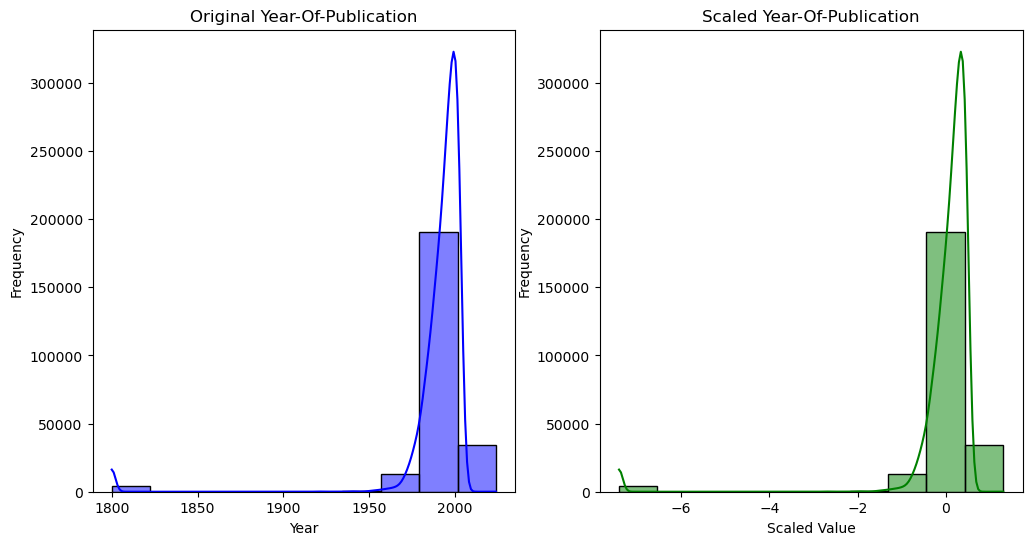

In [26]:
plt.figure(figsize=(12, 6))

# Plot original Year-Of-Publication
plt.subplot(1, 2, 1)
sns.histplot(data['Year-Of-Publication'], kde=True, bins=10, color='blue')
plt.title("Original Year-Of-Publication")
plt.xlabel("Year")
plt.ylabel("Frequency")

# Plot normalized Year-Of-Publication
plt.subplot(1, 2, 2)
sns.histplot(year_scaled.flatten(), kde=True, bins=10, color='green')
plt.title("Scaled Year-Of-Publication")
plt.xlabel("Scaled Value")
plt.ylabel("Frequency")

In [27]:
year_scaled

array([[0.44241807],
       [0.4035555 ],
       [0.01492986],
       ...,
       [0.52014319],
       [0.20924268],
       [0.36469294]], shape=(242132, 1))

In [28]:
# Sparse matrix
year_sparse = csr_matrix(year_scaled)

In [29]:
# Combined cectors horizontally (horizontal stack)
combined_features = hstack([tridf_matrix, year_sparse])

In [30]:
combined_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2265484 stored elements and shape (242132, 116298)>

In [31]:
# KNN

In [32]:
# Get K-value
k_values = range(2,11)
performance_scores = []

for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(combined_features)
    
    distance, _ = model.kneighbors(combined_features[:5])
    avg = np.mean(distance)
    performance_scores.append(avg)

In [33]:
performance_scores

[np.float64(0.20376181632240523),
 np.float64(0.3179774091247865),
 np.float64(0.38805588330777285),
 np.float64(0.4358966466743061),
 np.float64(0.4696328147432077),
 np.float64(0.4947693615522952),
 np.float64(0.5141671032854174),
 np.float64(0.5307352549897822),
 np.float64(0.5443172109945499)]

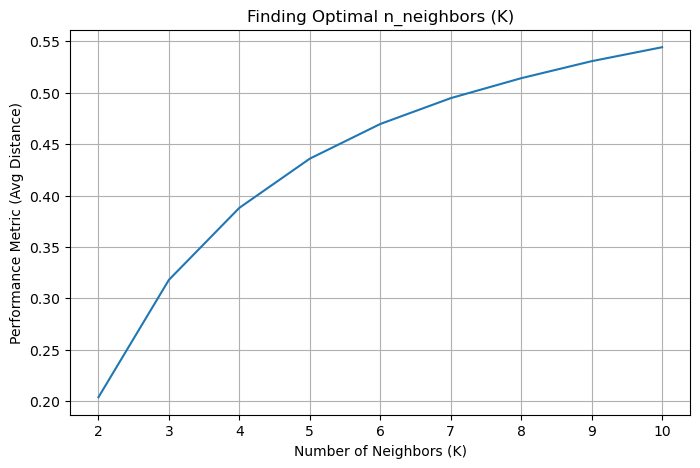

In [34]:
# Plot performance scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, performance_scores, )
plt.title("Finding Optimal n_neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Performance Metric (Avg Distance)")

plt.grid()
plt.show()

In [35]:
# Model training
model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(combined_features)

NearestNeighbors(metric='cosine', n_neighbors=6)

In [36]:
pickle.dump(model,open('knn_model.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
data.to_pickle('books.pkl')